In [2]:
from math import exp, sqrt, cos, sin
import itertools

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

## Konstante i osnovne funkcije

In [27]:
kb = 8.6173303 * 10**(-5)
pi = np.pi

hbar_w_op = 0.2
hbar_w_ac = 0.03
G_op2 = 0.25
G_ac2 = 0.05
eta = 7.85 * 10**(-3)
t = 2.52
Ef = 0.5
KF = Ef / 3 * 2 / t
kf = 1.799 * 10**(10)
a = 1.42 * 10**(-10)
Kf = kf * a

In [28]:
def fermi_dirac(E, Ef, T): 
    if T > 0:
       if E > Ef:
           return exp((-E + Ef) / (kb * T)) / (exp((-E + Ef) / (kb * T)) + 1)
       else:
           return 1 / (exp((E - Ef) / (kb * T)) + 1)
    else:
        if E < Ef: 
            return 0 
        else: 
            return 1

def bose_einstein(E, T): 
    assert T > 0
    return exp(-E / (kb * T)) / (-exp(-E / (kb * T)) + 1)

def chemical_potential(T):
    return Ef - pi**2 / 6 / Ef * (kb * T)**2

def eps(Kx, Ky):
    return t * sqrt(3 + 2 * cos(Kx) + 4 * cos(Kx/2) * cos(sqrt(3) * Ky / 2))

def eps_der_x(Kx, Ky):
    return -t / eps(Kx, Ky) * (sin(Kx) + cos(sqrt(3) * Ky / 2) * sin(Kx / 2))

## Optički fononi


In [29]:
def ss_sum_part(Kx, Ky, hbar_w, hbar_w_ph, T, u):
    def summand(s1, s2):
        return ((bose_einstein(hbar_w_ph, T) + fermi_dirac(s1 * s2 * eps(Kx, Ky), s1 * s2 * u, T)) / (hbar_w + s1 * Ef - s1 * eps(Kx, Ky) + s2 * hbar_w_ph + eta * 1j)) * (1 - eps_der_x(Kx, Ky) / eps_der_x(Kf, 0))
    sum = 0
    for s1, s2 in itertools.product([-1,1], [-1, 1]):
        sum = sum + summand(s1, s2)
    return sum

def ss_sum_real(Kx, Ky, hbar_w, hbar_w_ph, T, u):
    return ss_sum_part(Kx, Ky, hbar_w, hbar_w_ph, T, u).real

def ss_sum_imag(Kx, Ky, hbar_w, hbar_w_ph, T, u):
    return ss_sum_part(Kx, Ky, hbar_w, hbar_w_ph, T, u).imag

def mem_fn(ss_sum_fn, hbar_w, hbar_w_ph, u=Ef, T=50):    
    integral_k = integrate.nquad(ss_sum_fn, ([-2 * pi / 3, 2 * pi / 3], [-2 * pi / sqrt(3), 2 * pi / sqrt(3)]), args=(hbar_w, hbar_w_ph, T, u))[0]
    return -G_op2 * integral_k / (2*pi)**2 * 2


**Memorijska funkcija**

<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Patrik\AppData\Local\Temp\ipykernel_7080\1685320166.py:22: SyntaxWarning: invalid escape sequence '\e'
  plt.text(0.20, 0.002 , f"$\eta = $ {eta:.4f} $eV$" , fontsize =10)


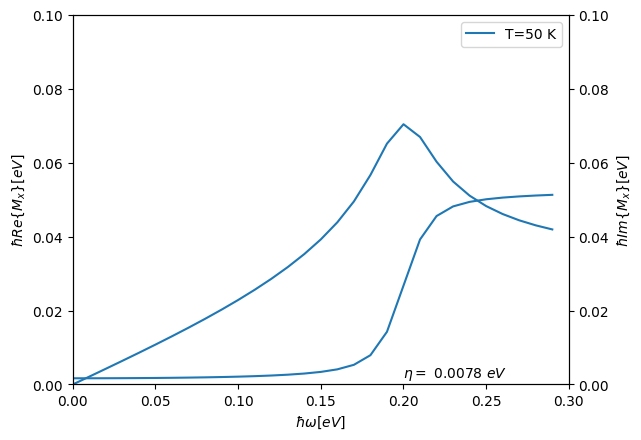

In [30]:
result_real = []
result_imag = []
ws = np.arange(0, 0.3, 0.01)
T=50
for w in ws:
    result_real.append(mem_fn(ss_sum_real, hbar_w=w, hbar_w_ph=hbar_w_op, u=chemical_potential(T)))
    result_imag.append(mem_fn(ss_sum_imag, hbar_w=w, hbar_w_ph=hbar_w_op, u=chemical_potential(T)))

fig, ax1 = plt.subplots()
ax1.plot(ws, result_real, label=f"T={T} K")
ax1.set_xlabel(r"$\hbar \omega [eV]$" )
ax1.set_ylabel(r"$\hbar Re\{M_x\} [eV]$" )
ax1.set_xlim([0.0, 0.3])
ax1.set_ylim([0.0, 0.1])

ax2 = ax1.twinx()
ax2.plot(ws, result_imag, label=f"T={T} K")
ax2.set_ylabel(r"$\hbar Im\{M_x\} [eV]$" )
ax2.set_xlim([0.0, 0.3])
ax2.set_ylim([0.0, 0.1])

plt.text(0.20, 0.002 , f"$\eta = $ {eta:.4f} $eV$" , fontsize =10)

plt.legend()
plt.show()

## Akustični fononi

In [31]:
def ss_sum_ac_part(Kx, Ky, hbar_w, hbar_w_ph, T, u):
    def summand(s1, s2):
        return (bose_einstein(hbar_w_ph * sqrt(Kx**2 + Ky**2), T) + fermi_dirac(s1 * s2 * eps(Kx, Ky), s1 * s2 * u, T)) / (hbar_w + s1 * Ef - s1 * eps(Kx, Ky) + s2 * hbar_w_ph * sqrt(Kx**2 + Ky**2) + eta * 1j) * (1 - eps_der_x(Kx, Ky) / eps_der_x(Kf, 0)) * (Kx**2 + Ky**2) if (Kx and Ky) else 0
    sum = 0
    for s1, s2 in itertools.product([-1,1], [-1, 1]):
        sum = sum + summand(s1, s2)
    return sum

def ss_sum_ac_real(Kx, Ky, hbar_w, hbar_w_ph, T, u):
    return ss_sum_ac_part(Kx, Ky, hbar_w, hbar_w_ph, T, u).real

def ss_sum_ac_imag(Kx, Ky, hbar_w, hbar_w_ph, T, u):
    return ss_sum_ac_part(Kx, Ky, hbar_w, hbar_w_ph, T, u).imag

def mem_fn_ac(ss_sum_fn, hbar_w, hbar_w_ph, u=Ef, T=50):    
    integral_k = integrate.nquad(ss_sum_fn, ([-2 * pi / 3, 2 * pi / 3], [-2 * pi / sqrt(3), 2 * pi / sqrt(3)]), args=(hbar_w, hbar_w_ph, T, u))[0]
    return -G_ac2 * integral_k / (2*pi)**2 * 2

**Memorijska funkcija**

<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Patrik\AppData\Local\Temp\ipykernel_7080\4114015563.py:22: SyntaxWarning: invalid escape sequence '\e'
  plt.text(0.20, 0.002 , f"$\eta = $ {eta:.4f} $eV$" , fontsize =10)


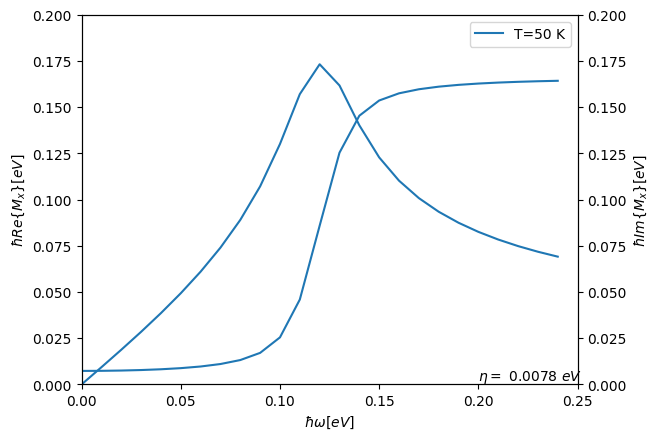

In [33]:
result_real = []
result_imag = []
ws = np.arange(0.0, 0.25, 0.01)
T=50
for w in ws:
    result_real.append(mem_fn_ac(ss_sum_ac_real, hbar_w=w, hbar_w_ph=hbar_w_ac, u=chemical_potential(T)))
    result_imag.append(mem_fn_ac(ss_sum_ac_imag, hbar_w=w, hbar_w_ph=hbar_w_ac, u=chemical_potential(T)))

fig, ax1 = plt.subplots()
ax1.plot(ws, result_real, label=f"T={T} K")
ax1.set_xlabel(r"$\hbar \omega [eV]$" )
ax1.set_ylabel(r"$\hbar Re\{M_x\} [eV]$" )
ax1.set_xlim([0.0, 0.25])
ax1.set_ylim([0.0, 0.2])

ax2 = ax1.twinx()
ax2.plot(ws, result_imag, label=f"T={T} K")
ax2.set_ylabel(r"$\hbar Im\{M_x\} [eV]$" )
ax2.set_xlim([0.0, 0.25])
ax2.set_ylim([0.0, 0.2])

plt.text(0.20, 0.002 , f"$\eta = $ {eta:.4f} $eV$" , fontsize =10)

plt.legend()
plt.show()